<a href="https://colab.research.google.com/github/hiya906/my-machine-learning/blob/master/Day2_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **사용법**

1.   우측 상단 '로그인'
2.   좌측 상단 '실습 모드에서 열기'


※ 각각의 셀은 셀 좌측 상단 실행 버튼을 통해 실행할 수 있습니다.

※ 실행 중 '경고: 이 노트는 Google에서 작성하지 않았습니다.'라는 창이 뜰 경우, '실행 전에 모든 런타임 재설정'란에 체크 후 '무시하고 계속하기'를 하시면 됩니다.

In [0]:
# 데이터를 관리하기 위해서 폴더를 생성하기 위한 코드입니다
import os

os.mkdir('./data')

# Logistic Regression by Numpy



# 실습1: Logistic Regression with Titanic data

In [0]:
#@title 필요 Package Import 

import os                            # 데이터 파일 경로 설정
import csv                           # 데이터 파일 로드
import numpy as np                   # numpy 행렬 조작
import matplotlib.pyplot as plt      # 그래프 그리기(선택 사항)

np.random.seed(123)

In [0]:
#@title 데이터 준비

def Titanic_Dataset(path, filename):
    file = os.path.join(path, filename)

    with open(file, 'r') as f:
        csv_reader = csv.reader(f)                  # 파일 로드
        header = next(csv_reader)

        x_data = []
        y_data = []
        for line in csv_reader:
            features = line[1:]
            x = [1] + list(map(float, features))    # x_data에 bias를 위한 1추가
            y = float(line[0])

            x_data.append(x)
            y_data.append(y)

        x_array = np.array(x_data)
        y_array = np.array(y_data)

    return header, x_array, y_array

# Logistic Regression Class 선언

1.   __init__


> *   인자: 모델 설정 
*   출력: x
*   기능: 모델 초기화

> weight *W*를 random하게 initialization


2.   __train__


> *   입력: 학습데이터, 학습 설정
*   출력: Loss 
*   기능: 데이터로 모델 학습

> 매 epoch마다 전체 데이터에 대해 loss, grad 계산하여 학습


3. __eval__

> *   입력: 검증 데이터
*   출력: 모델의 예측값
*   기능: train로 학습된 모델로 검증, 예측값 생성

> 검증 데이터에 대해 분류 예측 결과 산출 

4. ___sigmoid__

> *   입력: 실수형 numpy array
*   출력: sigmoid를 취한 array
*   기능: 주어진 array에 대한 모든 sigmoid 값 계산

> $sigmoid(x) =\frac{1}{ 1+e^{-(x)}}$





In [0]:
#@title 정답 코드
class LogisticRegression:
  def __init__(self, num_features):
      self.W = np.random.rand(num_features, 1) * 0.01

  def train(self, train_x, train_y, num_epochs, learning_rate):

      epsilon = 1e-10
      loss_memory = []
      train_y = np.expand_dims(train_y, 1)

      for epoch in range(num_epochs):
          # ====================== 아래에 코드를 작성해주세요 ======================
          # 1-1. logit 계산
          logit = np.matmul(train_x, self.W)

          # 1-2. sigmoid 적용
          prob = self._sigmoid(logit)

          # 1-3. Error 및 Loss 계산
          error = prob - train_y

          loss = train_y * np.log(prob + epsilon) + (1 - train_y) * np.log(1 - prob + epsilon)
          loss = - np.sum(loss)


          # print(loss)
          # 1-4. Loss ‘loss_memory’에 추가
          loss_memory.append(loss)

          # 1-5. Gradient 계산
          grad = np.mean(train_x * error, axis=0, keepdims=True).T

          # 1-6. Weight Update
          self.W -= grad * learning_rate
          # ==================================================================

      # 2. ‘loss_memory’ 반환
      return loss_memory


  def predict(self, test_x):
      prob = self._sigmoid(np.matmul(test_x, self.W))

      return prob

  def _sigmoid(self, x):
      return 1 / (1 + np.exp(-x))
      
def Accuracy(prob, true):
  Acc = 0
  
  #Acc 계산
  pred = np.round(prob, 0)
  correct = np.sum(pred.squeeze() == true.squeeze())
  num_data = pred.shape[0]

  Acc = correct / num_data

  return Acc

In [0]:
#@title 모델 학습
num_epochs = 1000
learning_rate = 1e-3

header, train_x, train_y = Titanic_Dataset('./data', 'Titanic_train.csv')
num_data, num_features = train_x.shape

model = LogisticRegression(num_features)
loss_memory = model.train(train_x, train_y, num_epochs, learning_rate)

In [8]:
#@title 모델 평가

_, test_x, test_y = Titanic_Dataset('./data', 'Titanic_test.csv')
pred = model.predict(test_x)
acc = Accuracy(pred, test_y)

print('Accuracy: ', acc)

Accuracy:  0.7037037037037037


In [0]:
#@title 정답 코드
class LogisticRegression:
  def __init__(self, num_features):
      self.W = np.random.rand(num_features, 1) * 0.01

  def train(self, train_x, train_y, num_epochs, learning_rate):

      epsilon = 1e-10
      loss_memory = []
      train_y = np.expand_dims(train_y, 1)

      for epoch in range(num_epochs):
          # ====================== 아래에 코드를 작성해주세요 ======================
          # 1-1. logit 계산
          logit = np.matmul(train_x, self.W)

          # 1-2. sigmoid 적용
          prob = self._sigmoid(logit)

          # 1-3. Error 및 Loss 계산
          error = prob - train_y

          loss = train_y * np.log(prob + epsilon) + (1 - train_y) * np.log(1 - prob + epsilon)
          loss = - np.sum(loss)


          # print(loss)
          # 1-4. Loss ‘loss_memory’에 추가
          loss_memory.append(loss)

          # 1-5. Gradient 계산
          grad = np.mean(train_x * error, axis=0, keepdims=True).T

          # 1-6. Weight Update
          self.W -= grad * learning_rate
          # ==================================================================

      # 2. ‘loss_memory’ 반환
      return loss_memory


  def predict(self, test_x):
      prob = self._sigmoid(np.matmul(test_x, self.W))

      return prob

  def _sigmoid(self, x):
      return 1 / (1 + np.exp(-x))
      
def Accuracy(prob, true):
  Acc = 0
  
  #Acc 계산
  pred = np.round(prob, 0)
  correct = np.sum(pred.squeeze() == true.squeeze())
  num_data = pred.shape[0]

  Acc = correct / num_data

  return Acc

# 실습2: Logistic Regression with Iris data

In [0]:
#@title 필요 Package import
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

In [0]:
#@title 데이터 준비
def Iris_Dataset(path, filename):
    file = os.path.join(path, filename)

    with open(file, 'r') as f:
        csv_reader = csv.reader(f)
        header = next(csv_reader)

        x_data = []
        y_data = []
        for line in csv_reader:

            features = line[:-1]
            x = [1] + list(map(float, features))
            y = float(line[-1])

            x_data.append(x)
            y_data.append(y)

        x_array = np.array(x_data)
        y_array = np.array(y_data)

        return header, x_array, y_array

In [0]:
#@title 모델 학습
num_epochs = 10000
learning_rate = 1e-2

header, train_x, train_y = Iris_Dataset('./data', 'Iris_Train.csv')

num_data, num_features = train_x.shape
model = LogisticRegression(num_features)

loss_memory = model.train(train_x, train_y, num_epochs, learning_rate)

In [12]:
#@title 모델 평가
_, test_x, test_y = Iris_Dataset('./data', 'Iris_Test.csv')

pred = model.predict(test_x)
accuracy = Accuracy(pred, test_y)

print('Accuracy : ', accuracy)

Accuracy :  1.0


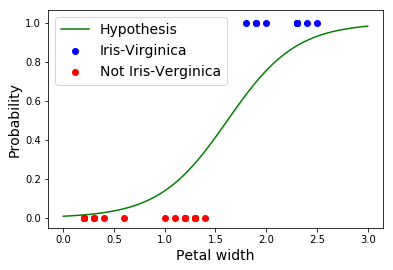

In [13]:
#@title 그래프 표현
is_virginica_x = test_x[test_y == 1]
is_virginica_y = test_y[test_y == 1]

not_virginica_x = test_x[test_y == 0]
not_virginica_y = test_y[test_y == 0]


plot_feat = np.linspace(0, 3, 100).reshape(-1, 1)
plot_bias = np.ones_like(plot_feat)

plot_x = np.concatenate((plot_bias, plot_feat), axis=1)
plot_prob = model.predict(plot_x)

plt.scatter(is_virginica_x[:, 1], is_virginica_y, color='b', label='Iris-Virginica')
plt.scatter(not_virginica_x[:, 1], not_virginica_y, color='r', label='Not Iris-Verginica')
plt.plot(plot_feat, plot_prob, 'g-', label='Hypothesis')

plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

# 실습3: Logistic Regression with Tensorflow 

In [0]:
#@title 필요 Package import

import os
import csv
import numpy as np
import tensorflow as tf

tf.random.set_random_seed(100)

In [0]:
#@title 데이터 준비

num_epochs = 2000
learning_rate = 1e-3

header, train_x, train_y = Titanic_Dataset('./data', 'Titanic_train.csv')
_, test_x, test_y = Titanic_Dataset('./data', 'Titanic_test.csv')

num_data, num_features = train_x.shape


In [0]:
#@title 모델 생성

X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([num_features, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# model prediction 
logit = tf.matmul(X, W) + b
prob = tf.sigmoid(logit)

# Loss 및 학습법 정의
epsilon = 1e-10
loss = -tf.reduce_mean(Y * tf.log(prob + epsilon) + (1 - Y)*tf.log((1-prob) + epsilon))
train = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)

#평가 방법
pred = tf.cast(prob > 0.5, dtype=tf.float32)
correct = tf.cast(tf.equal(pred, Y), dtype=tf.float32)
Accuracy = tf.reduce_mean(correct)

In [18]:
#@title 모델 학습

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1, num_epochs+1):
    loss_val, training = sess.run([loss, train], feed_dict={X: train_x, Y: train_y})

    if step % 100 == 0:
        print('step: ', step, 'loss: ', loss_val)

step:  100 loss:  4.751186
step:  200 loss:  1.8603483
step:  300 loss:  0.9127513
step:  400 loss:  0.9016853
step:  500 loss:  0.8912981
step:  600 loss:  0.88155425
step:  700 loss:  0.87241703
step:  800 loss:  0.86385393
step:  900 loss:  0.8558255
step:  1000 loss:  0.8483006
step:  1100 loss:  0.841246
step:  1200 loss:  0.8346318
step:  1300 loss:  0.82842565
step:  1400 loss:  0.82260317
step:  1500 loss:  0.8171359
step:  1600 loss:  0.81199867
step:  1700 loss:  0.80716854
step:  1800 loss:  0.80262357
step:  1900 loss:  0.79834276
step:  2000 loss:  0.7943066


In [19]:
#@title 모델 평가
_prob, _pred, _accuracy = sess.run([prob, pred, Accuracy], feed_dict={X: test_x, Y:test_y})
print('logit: ', _prob[:10], '\nAccuracy: ', _accuracy)
sess.close()


logit:  [[0.6077302 ]
 [0.46143475]
 [0.46142948]
 [0.20072547]
 [0.9743958 ]
 [0.6593118 ]
 [0.35063604]
 [0.46954417]
 [0.4363027 ]
 [0.99743146]] 
Accuracy:  0.6042524


# Appendix: And OR Gate 구현하기

In [0]:
#@title 필요 Package import

import os
import csv
import numpy as np
import tensorflow as tf

tf.random.set_random_seed(100)

# 정답



In [0]:
#@title 데이터 준비

num_epochs = 2000
learning_rate = 1e-2

x_data = [ [1., 0., 0.], # bias를위한 1 추가
          [1., 0., 1.],
          [1., 1., 0.],
          [1., 1., 1.]]

y_data_and = [[0], [0], [0], [1]]
y_data_or = [[0], [1], [1], [1]]

X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

In [0]:
#@title 모델 생성
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# model prediction 
logit = tf.matmul(X, W) + b
prob = tf.sigmoid(logit)

# Loss 및 학습법 정의
epsilon = 1e-10
loss = -tf.reduce_mean(Y * tf.log(prob + epsilon) + (1 - Y)*tf.log((1-prob) + epsilon))
train = tf.train.GradientDescentOptimizer(learning_rate= learning_rate).minimize(loss)

#평가 방법
pred = tf.cast(prob > 0.5, dtype=tf.float32)
correct = tf.cast(tf.equal(pred, Y), dtype=tf.float32)
Accuracy = tf.reduce_mean(correct)

In [59]:
#@title 모델 학습

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(1, num_epochs+1):
    loss_val, training = sess.run([loss, train], feed_dict={X: x_data, Y: y_data_and})

    if step % 100 == 0:
        print('step: ', step, 'loss: ', loss_val)

step:  100 loss:  0.75107586
step:  200 loss:  0.7056655
step:  300 loss:  0.66839194
step:  400 loss:  0.63560486
step:  500 loss:  0.60594845
step:  600 loss:  0.57883227
step:  700 loss:  0.5539292
step:  800 loss:  0.5310072
step:  900 loss:  0.5098734
step:  1000 loss:  0.4903569
step:  1100 loss:  0.4723027
step:  1200 loss:  0.45557034
step:  1300 loss:  0.44003272
step:  1400 loss:  0.4255755
step:  1500 loss:  0.41209602
step:  1600 loss:  0.39950234
step:  1700 loss:  0.38771248
step:  1800 loss:  0.3766529
step:  1900 loss:  0.36625838
step:  2000 loss:  0.3564703


In [60]:
#@title 모델 평가
_prob, _pred, _accuracy = sess.run([prob, pred, Accuracy], feed_dict={X: x_data, Y:y_data_and})
print('logit: ', _prob, '\nAccuracy: ', _accuracy)
sess.close()

logit:  [[0.11341632]
 [0.2917149 ]
 [0.23937859]
 [0.5032877 ]] 
Accuracy:  1.0
